In [ ]:
# importing libraries
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# Upload the data
from google.colab import files
uploaded = files.upload()

Saving btc_data.csv to btc_data (2).csv


In [ ]:
# Read the csv file
df= pd.read_csv("btc_data.csv")

df.head()

,timestamp,exchange,open,high,low,close,volume,trade_count,vwap,symbol
0,2017-08-22 05:00:00+00:00,CBSE,3662.74,4145.00,3583.46,4092.00,13675.653936,39320,3934.254578,BTCUSD
1,2017-08-23 05:00:00+00:00,CBSE,4142.50,4218.00,4112.76,4143.27,2299.176066,8164,4159.198204,BTCUSD
2,2017-08-24 05:00:00+00:00,CBSE,4143.28,4349.99,4134.61,4312.03,7921.954295,31051,4231.990112,BTCUSD
3,2017-08-25 05:00:00+00:00,CBSE,4325.01,4453.90,4284.01,4360.00,8711.254435,30231,4368.579716,BTCUSD
4,2017-08-26 05:00:00+00:00,CBSE,4344.32,4392.00,4320.84,4326.00,1588.006506,7440,4350.164046,BTCUSD


In [ ]:
# Seperate Dates for future plotting
train_dates = pd.to_datetime(df["timestamp"])

# check last few dates
print(train_dates.tail(15))

1811   2022-08-07 05:00:00+00:00
1812   2022-08-08 05:00:00+00:00
1813   2022-08-09 05:00:00+00:00
1814   2022-08-10 05:00:00+00:00
1815   2022-08-11 05:00:00+00:00
1816   2022-08-12 05:00:00+00:00
1817   2022-08-13 05:00:00+00:00
1818   2022-08-14 05:00:00+00:00
1819   2022-08-15 05:00:00+00:00
1820   2022-08-16 05:00:00+00:00
1821   2022-08-17 05:00:00+00:00
1822   2022-08-18 05:00:00+00:00
1823   2022-08-19 05:00:00+00:00
1824   2022-08-20 05:00:00+00:00
1825   2022-08-21 05:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


In [ ]:
# new dataframe with only Train data
df_btc = df.drop(columns = ["exchange","trade_count","vwap","symbol"])

df_btc.tail()

,timestamp,open,high,low,close,volume
1821,2022-08-17 05:00:00+00:00,24072.26,24448.49,23180.14,23379.04,21507.482650
1822,2022-08-18 05:00:00+00:00,23379.04,23600.00,22712.22,22787.49,16656.303422
1823,2022-08-19 05:00:00+00:00,22789.49,22835.53,20782.39,21244.91,46606.469108
1824,2022-08-20 05:00:00+00:00,21243.75,21372.93,20760.93,21200.14,18975.526149
1825,2022-08-21 05:00:00+00:00,21200.14,21795.08,21067.33,21468.38,16745.547484


In [ ]:
# re-arranging order of columns for Train Data
df_btc["adj close"] = df_btc["close"]

df_btc = df_btc[["timestamp","open","high","low","close","adj close"]]

df_btc.tail()

,timestamp,open,high,low,close,adj close
1821,2022-08-17 05:00:00+00:00,24072.26,24448.49,23180.14,23379.04,23379.04
1822,2022-08-18 05:00:00+00:00,23379.04,23600.00,22712.22,22787.49,22787.49
1823,2022-08-19 05:00:00+00:00,22789.49,22835.53,20782.39,21244.91,21244.91
1824,2022-08-20 05:00:00+00:00,21243.75,21372.93,20760.93,21200.14,21200.14
1825,2022-08-21 05:00:00+00:00,21200.14,21795.08,21067.33,21468.38,21468.38


In [ ]:
# Variables for training
cols = list(df_btc)[1:6]
print(cols)

['open', 'high', 'low', 'close', 'adj close']


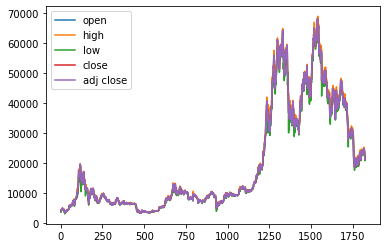

In [ ]:
# New dataframe with only training data 
df_for_training = df_btc[cols].astype(float)

df_for_training.plot()

In [ ]:
# import libraries for Nerual Network Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# normalize the dataset 
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
# For LSTM networks, Data require to be reformat into n_sameples x timestemps x n_features
# n_features is 5,  timesteps = 14 (past days used for training)


In [ ]:
# Creating empty list for Xtrain and Ytrain

trainX = []
trainy = []

n_future = 1 # number of days looking to predict
n_past = 14 # number of days we use to predict the future

In [ ]:
# Reformat input data into a shape: (n_sample x timestamps x n_features)
# our df_for_training has a shape of (1825,5)
# 1825 refers to the number of data points and 5 refers to the columns (multi_variables)


for i in range(n_past, len(df_for_training_scaled) - n_future +1 ):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[-1]])
    trainy.append(df_for_training_scaled[i+ n_future - 1 : i+n_future, 0 ])
    
trainX, trainy = np.array(trainX), np.array(trainy)

print('trainX shape == {}.'.format(trainX.shape))
print('trainy shape == {}.'.format(trainX.shape))

trainX shape == (1812, 14, 5).
trainy shape == (1812, 14, 5).


In [ ]:
#In our dataset, trainX has a shape (1811, 14, 5). 
#1811 because we are looking back 14 days (1825 - 14 = 1811). 
#we cannot look back 14 days until we get to the 15th day. 
#Also, trainy has a shape (1811, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in our example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define and input Neural Network

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainy.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
102/102 [==============================] - 4s 18ms/step - loss: 0.1509 - val_loss: 0.0244
Epoch 2/50
102/102 [==============================] - 1s 15ms/step - loss: 0.0449 - val_loss: 0.0413
Epoch 3/50
102/102 [==============================] - 1s 14ms/step - loss: 0.0449 - val_loss: 0.0318
Epoch 4/50
102/102 [==============================] - 1s 15ms/step - loss: 0.0360 - val_loss: 0.0479
Epoch 5/50
102/102 [==============================] - 1s 15ms/step - loss: 0.0389 - val_loss: 0.0205
Epoch 6/50
102/102 [==============================] - 1s 14ms/step - loss: 0.0371 - val_loss: 0.0295
Epoch 7/50
102/102 [==============================] - 2s 15ms/step - loss: 0.0356 - val_loss: 0.0247
Epoch 8/50
102/102 [==============================] - 2s 15ms/step - loss: 0.0324 - val_loss: 0.0178
Epoch 9/50
102/102 [==============================] - 2s 15ms/step - loss: 0.0320 - val_loss: 0.0141
Epoch 10/50
102/102 [==============================] - 1s 15ms/step - loss: 0.0315 - val_lo

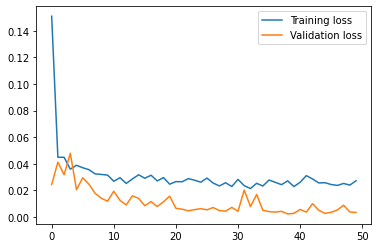

In [ ]:
# fit the model 
history = model.fit(trainX, trainy, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

[Timestamp('2022-08-06 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-07 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-08 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-09 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-10 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-11 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-12 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-13 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-14 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-15 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-16 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-17 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-18 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-19 05:00:00+0000', tz='UTC', freq='D'), Timestamp('2022-08-20 05:00:00+0000', tz='UTC', freq='D')]


In [ ]:
# make predictions


# shape = (n,1) where n is the n_days_for_predictions
prediction = model.predict(trainX[-n_days_for_prediction:])

In [ ]:
# Perform inverse Transformation to rescale back to original range
# Since we used 5 variables for transform, the inverse expects same dimensions
# Therefore,  copying values 5 times and discarding them after inverse transform

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis = -1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyError: ignored

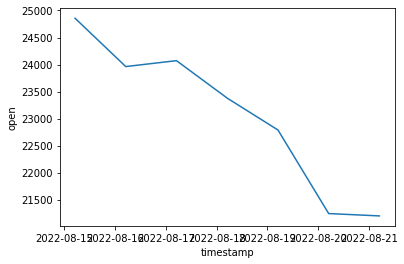

In [99]:
original = df_btc[['timestamp', 'open']]
original['timestamp']=pd.to_datetime(original['timestamp'])
original = original.loc[original['timestamp'] >= '2022-08-15']

sns.lineplot(original['timestamp'], original['open'])
sns.lineplot(df_forecast['timestamp'], df_forecast['open'])